In [1]:
import numpy as np
from spec_id import Gen_spec, Median_w_Error_cont
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [10]:
np.round(10**(np.array(tau[1:])-9),2)

array([ 0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.71,  0.79,  0.89,
        1.  ,  1.1 ,  1.2 ,  1.29,  1.41,  1.51,  1.58,  1.7 ,  1.82,
        1.91,  2.  ,  2.09,  2.19,  2.29,  2.4 ,  2.51,  2.57,  2.69,
        2.82,  2.88,  3.02])

In [38]:
cnames = list(goods_s.columns)

# for i in range(len(cnames)):
#     if cnames[i][0:2] == 'f_':
#         print cnames[i]
filt_s = ['f_F606Wcand','f_F606W','f_R','f_Rc','f_F775W','f_I','f_F814Wcand','f_F850LP','f_F850LPcand','f_F098M','f_F105W',
          'f_F125W','f_J','f_tenisJ','f_F140W','f_H','f_tenisK','f_Ks','f_IA624','f_IA651','f_IA679','f_IA709','f_IA738',
          'f_IA767','f_IA797','f_IA827','f_IA856']
e_filt_s = ['e_F606Wcand','e_F606W','e_R','e_Rc','e_F775W','e_I','e_F814Wcand','e_F850LP','e_F850LPcand','e_F098M','e_F105W',
          'e_F125W','e_J','e_tenisJ','e_F140W','e_H','e_tenisK','e_Ks','e_IA624','e_IA651','e_IA679','e_IA709','e_IA738',
            'e_IA767','e_IA797','e_IA827','e_IA856']

filt_n = ['f_F606W','f_R','f_Rs','f_I','f_F775W','f_Z','f_F850LP','f_F105W','f_F125W','f_J','f_F140W','f_H','f_Ks']
e_filt_n = ['e_F606W','e_R','e_Rs','e_I','e_F775W','e_Z','e_F850LP','e_F105W','e_F125W','e_J','e_F140W','e_H','e_Ks']

NameError: name 'goods_s' is not defined

In [39]:
filters=['f_F606Wcand','f_F606W','f_R','f_Rc','f_F775W','f_I','f_F814Wcand','f_F850LP','f_F850LPcand','f_F098M','f_F105W',
          'f_F125W','f_J','f_tenisJ','f_F140W','f_H','f_tenisK','f_Ks','f_IA624','f_IA651','f_IA679','f_IA709','f_IA738',
          'f_IA767','f_IA797','f_IA827','f_IA856','f_F606W','f_R','f_Rs','f_I','f_F775W','f_Z','f_F850LP','f_F105W',
          'f_F125W','f_J','f_F140W','f_H','f_Ks']

f_errors=['e_F606Wcand','e_F606W','e_R','e_Rc','e_F775W','e_I','e_F814Wcand','e_F850LP','e_F850LPcand','e_F098M','e_F105W',
          'e_F125W','e_J','e_tenisJ','e_F140W','e_H','e_tenisK','e_Ks','e_IA624','e_IA651','e_IA679','e_IA709','e_IA738',
          'e_IA767','e_IA797','e_IA827','e_IA856','e_F606W','e_R','e_Rs','e_I','e_F775W','e_Z','e_F850LP','e_F105W',
          'e_F125W','e_J','e_F140W','e_H','e_Ks']

In [35]:
filt_names=['s_F606Wcand','s_F606W','s_R','s_Rc','s_F775W','s_I','s_F814Wcand','s_F850LP','s_F850LPcand','s_F098M','s_F105W',
          's_F125W','s_J','s_tenisJ','s_F140W','s_H','s_tenisK','s_Ks','s_IA624','s_IA651','s_IA679','s_IA709','s_IA738',
          's_IA767','s_IA797','s_IA827','s_IA856','n_F606W','n_R','n_Rs','n_I','n_F775W','n_Z','n_F850LP','n_F105W',
          'n_F125W','n_J','n_F140W','n_H','n_Ks']
effwv = [5818,5818,6418,6460,7634,8549,8001,9001,9001,9841,10476,12410,12311,12513,13831,16451,21534,21638,
         6229,6497,6780,7072,7358,7679,7964,8245,8563,5818,6487,6788,7939,7634,9077,9001,10476,12410,12499,13831,16307,21541]
fwhm = [1550,1550,943,1103,990,1356,1585,1235,1235,1163,1979,2041,1774,1080,2676,1991,2135,1854,225,240,250,
        237,237,262,266,245,266,1550,817,1047,982,990,970,1235,1979,2041,1108,2676,1912,2073]
phot_db = pd.DataFrame({'eff_wv' : effwv, 'fwhm' : fwhm },index = filt_names)

In [7]:
phot_db = pd.read_pickle('../data/phot_db.pkl')
gphot_db = pd.read_pickle('../data/gphot_db.pkl')
fDB = pd.read_pickle('../data/filter_db.pkl')

In [26]:
gphot_db

,eff_wv,fwhm,n14713,n14713_err,n16758,n16758_err,n17070,n17070_err,n19442,n19442_err,...,s45972,s45972_err,s46066,s46066_err,s46345,s46345_err,s47677,s47677_err,s48631,s48631_err
F850LP,9001,1235,-9.900000e+01,-9.900000e+01,1.747697e-18,2.422580e-19,1.460517e-18,4.796781e-16,3.264858e-19,3.000168e-19,...,2.011440e-18,2.151872e-19,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,5.076848e-19,2.006029e-19,1.673274e-18,3.372973e-19
F098M,9841,1163,9.769333e-19,2.634086e-19,2.098037e-18,1.445953e-19,1.776399e-18,1.546954e-15,3.732585e-19,2.511762e-19,...,2.273222e-18,1.341041e-19,-9.900000e+01,-9.900000e+01,2.392788e-19,1.000450e-19,6.410471e-19,1.298577e-19,1.888517e-18,1.678651e-19
Subaru-IA827,8245,245,8.229581e-19,8.340300e-19,1.344934e-18,4.807593e-19,1.026516e-18,9.274676e-19,3.103016e-19,5.189770e-19,...,1.572377e-18,4.653268e-19,5.621589e-19,6.620920e-19,2.536885e-19,3.105887e-19,3.113629e-19,3.917838e-19,1.490061e-18,9.242394e-19
Subaru-IA856,8563,266,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,1.064267e-18,6.100259e-19,2.494950e-19,3.569217e-19,...,1.782134e-18,2.815424e-19,6.039884e-19,4.402900e-19,-9.900000e+01,-9.900000e+01,3.919963e-19,2.617631e-19,1.533059e-18,5.284655e-19
Subaru-suprime-z,9077,970,7.964886e-19,3.818980e-19,1.796225e-18,2.212656e-19,1.513685e-18,1.911744e-16,3.083753e-19,2.809899e-19,...,2.043646e-18,1.945843e-19,6.294148e-19,2.951754e-19,2.333093e-19,1.460643e-19,5.240084e-19,1.831599e-19,1.641221e-18,2.742698e-19


In [41]:
sf850,sf850c,sf098,nf850,f850,f098 = [[],[],[],[],[],[]]
sf850_e,sf850c_e,sf098_e,nf850_e,f850_e,f098_e = [[],[],[],[],[],[]]


for i in galDB.index:
    sf850.append(phot_db[galDB['gids'][i]]['s_F850LP'])
    sf850_e.append(phot_db['%s_err' % galDB['gids'][i]]['s_F850LP'])
    
    sf850c.append(phot_db[galDB['gids'][i]]['s_F850LPcand'])
    sf850c_e.append(phot_db['%s_err' % galDB['gids'][i]]['s_F850LPcand'])
    
    sf098.append(phot_db[galDB['gids'][i]]['s_F098M'])
    sf098_e.append(phot_db['%s_err' % galDB['gids'][i]]['s_F098M'])
    
    nf850.append(phot_db[galDB['gids'][i]]['n_F850LP'])
    nf850_e.append(phot_db['%s_err' % galDB['gids'][i]]['n_F850LP'])
    
    f850.append(gphot_db[galDB['gids'][i]]['F850LP'])
    f850_e.append(gphot_db['%s_err' % galDB['gids'][i]]['F850LP'])
    
    f098.append(gphot_db[galDB['gids'][i]]['F098M'])
    f098_e.append(gphot_db['%s_err' % galDB['gids'][i]]['F098M'])

In [31]:
filtDB = pd.DataFrame({'gids':galDB['gids'], 
                       'S_F850':sf850, 'S_F850_err': sf850_e, 
                       'S_F850_C':sf850c, 'S_F850_C_err': sf850c_e,
                       'S_F098':sf098,'S_F098_err':sf098_e,
                       'N_F085':nf850,'N_F850_err':nf850_e,
                       'M_F850':f850,'M_F850_err':f850_e,
                       'M_F098':f098,'M_F098_err':f098_e})

In [34]:
pd.to_pickle(filtDB,'../data/filter_db.pkl')

In [42]:
filters = [240,201,197,198,284]

for i in galDB.index:
    spec = Gen_spec(galDB['gids'][i], galDB['hi_res_specz'][i])

    gphot = np.repeat(-99.,len(filters))
    gphoter = np.repeat(-99.,len(filters))
    gal_phot = Photometry(spec.gal_wv,spec.gal_fl,spec.gal_er,240)
    for ii in range(len(filters)):
        gal_phot.Get_Sensitivity(filters[ii])
        if spec.gal_wv[0] <= gal_phot.sens_wv[0] and gal_phot.sens_wv[-1] <= spec.gal_wv[-1]:
            gal_phot.Photo()
            effwv,gphot[ii],gphoter[ii] = [gal_phot.eff_wv,gal_phot.photo,gal_phot.photo_er]
    gphot_add = pd.DataFrame({galDB['gids'][i] : gphot, '%s_err' % galDB['gids'][i] : gphoter },index = filter_names)
    gphot_db = gphot_db.join(gphot_add)

../data/galaxy_flts/n14713_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n14713_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n14713_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n14713_flt: save ../data/galaxy_flts/n14713_flt.detect_seg.fits, ../data/galaxy_flts/n14713_flt.detect.cat


ValueError: columns overlap but no suffix specified: Index([u'n14713', u'n14713_err'], dtype='object')

In [3]:
filts = [201,240,202]

f098wv = []
f098p = []
f098err = []

f850wv = []
f850p = []
f850err = []

f105wv = []
f105p = []
f105err = []

for i in galDB.index:
    spec = Gen_spec(galDB['gids'][i], galDB['hi_res_specz'][i],minwv=7500,maxwv=11750)
    gal_phot = Photometry(spec.gal_wv[spec.gal_fl > 5E-21],spec.gal_fl[spec.gal_fl > 5E-21],
                          spec.gal_er[spec.gal_fl > 5E-21],201)
    
    gal_phot.Get_Sensitivity(201)
    gal_phot.Photo_clipped()
    f098wv.append(gal_phot.eff_wv)
    f098p.append(gal_phot.photo)
    f098err.append(gal_phot.photo_er)

    gal_phot.Get_Sensitivity(240)
    gal_phot.Photo_clipped()
    f850wv.append(gal_phot.eff_wv)
    f850p.append(gal_phot.photo)
    f850err.append(gal_phot.photo_er)

    gal_phot.Get_Sensitivity(202)
    gal_phot.Photo_clipped()
    f105wv.append(gal_phot.eff_wv)
    f105p.append(gal_phot.photo)
    f105err.append(gal_phot.photo_er)


spec_id.py:685: RuntimeWarning: invalid value encountered in greater
  self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
spec_id.py:686: RuntimeWarning: invalid value encountered in greater
  self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
spec_id.py:687: RuntimeWarning: invalid value encountered in greater
  self.gal_er = self.gal_er[self.gal_fl > 0 ]
spec_id.py:688: RuntimeWarning: invalid value encountered in greater
  self.gal_fl = self.gal_fl[self.gal_fl > 0 ]


No TEAL-based tasks available for this package!
../data/galaxy_flts/n14713_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n14713_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n14713_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n14713_flt: save ../data/galaxy_flts/n14713_flt.detect_seg.fits, ../data/galaxy_flts/n14713_flt.detect.cat


../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../data/galaxy_flts/n16758_flt.detect.cat
../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../dat

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:1023: RuntimeWarning: invalid value encountered in less
  bad = self.data['SCI'] < sigma*self.data['ERR']


../data/galaxy_flts/s35774_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s35774_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s35774_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s35774_flt: save ../data/galaxy_flts/s35774_flt.detect_seg.fits, ../data/galaxy_flts/s35774_flt.detect.cat
../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../dat

In [12]:
galDB['gids'].values[14]

's39170'

In [13]:
print f098p[14]
print f098err[14]
print f850p[14]
print f850err[14]
print f105p[14]
print f105err[14]

4.5050228007e-18
1.58651228894e-19
4.03969275651e-18
2.54256488826e-19
4.84370450776e-18
3.33846649097e-19


[7.976207263845979e-19, 1.7476965284048995e-18, 1.5246039711597261e-18, 3.2681100332406133e-19, 2.0077628183328063e-18, 5.6551298388125809e-19, 6.1278113913034269e-19, 1.1199790591666988e-18, 2.2311557118398453e-18, 1.3191868723050795e-18, 8.8211204520103829e-19, 1.8750527788314787e-18, 1.2259684986274643e-18, 2.5186928796071945e-19, 4.0396927565067723e-18, 2.1436703018650864e-18, 1.4619005856702129e-18, 8.866835252375453e-19, 5.1596970558948079e-19, 2.4646070280006109e-19, 8.9565077168681295e-19, 2.230325008492751e-18, 3.9196416044642444e-19, 7.3857443725117632e-19, 2.6787283412731507e-19, 3.6483457833605156e-19, 1.5830648098224543e-19, 1.0355463148102227e-18, 5.1506769374025293e-19, 6.1809326354834923e-19, 2.0114402040475919e-18, 6.6946146198448512e-19, 2.3289673235533679e-19, 5.0768482983538133e-19, 1.6732736904155878e-18]


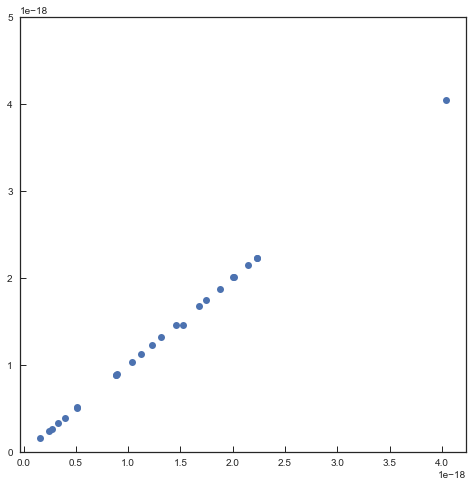

In [15]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(f850p,fDB['M_F850'],'o')
plt.ylim(0,5E-18)

print f850p

In [14]:
fDB

,M_F098,M_F098_err,M_F850,M_F850_err,N_F085,N_F850_err,S_F098,S_F098_err,S_F850,S_F850_C,S_F850_C_err,S_F850_err,gids
43,9.769333e-19,2.634086e-19,-9.900000e+01,-9.900000e+01,5.286964,0.047748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n14713
49,2.098037e-18,1.445953e-19,1.747697e-18,2.422580e-19,13.888487,0.057810,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n16758
50,1.776399e-18,1.546954e-15,1.460517e-18,4.796781e-16,11.737332,0.045581,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n17070
58,3.732585e-19,2.511762e-19,3.264858e-19,3.000168e-19,2.900199,0.043631,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n19442
61,2.669737e-18,1.229185e-19,2.007763e-18,1.914146e-19,14.816056,0.065226,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21156
62,6.894339e-19,2.779345e-19,-9.900000e+01,-9.900000e+01,3.911611,0.050748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21427
69,7.516320e-19,1.728003e-19,-9.900000e+01,-9.900000e+01,4.026039,0.051848,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n23435
86,1.314887e-18,1.625707e-19,1.119979e-18,2.683114e-19,8.267406,0.063951,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n32566
96,2.779187e-18,1.763211e-19,2.231156e-18,3.143401e-19,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n34694
107,1.752857e-18,1.496945e-19,1.319187e-18,2.338029e-19,9.538568,0.051461,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n37686


In [4]:
smpDB = pd.read_pickle('../data/sim_meas_phot.pkl')
# smpDB = smpDB[smpDB['gal_ids'] != 's35774']
f098DB = smpDB[smpDB['meas-f098'] > 0]

def Magnitude(flam):
    mag=-2.5*np.log10(flam)
    return mag

Clam = 3E18 / 10475.92199 **2 * 10**((-1.1)/2.5-29)

In [11]:
smpDB

,f098-effwv,f105-effwv,f850-effwv,gal_ids,meas-f098,meas-f098_err,meas-f105,meas-f105_err,meas-f850,meas-f850_err,sim-f098,sim-f098_err,sim-f105,sim-f105_err,sim-f850,sim-f850_err
43,9840.877482,10475.92199,9001.008862,n14713,-9.900000e+01,-9.900000e+01,9.523942e-19,2.676457e-21,7.107964e-19,6.419394e-21,9.769333e-19,2.634086e-19,1.093194e-18,1.093194e-18,7.976207e-19,7.976207e-19
49,9840.877482,10475.92199,9001.008862,n16758,-9.900000e+01,-9.900000e+01,2.278121e-18,2.930002e-21,1.867213e-18,7.772162e-21,2.098037e-18,1.445953e-19,2.108791e-18,2.108791e-18,1.747697e-18,1.747697e-18
50,9840.877482,10475.92199,9001.008862,n17070,-9.900000e+01,-9.900000e+01,2.254741e-18,3.061484e-21,1.578005e-18,6.128056e-21,1.776399e-18,1.546954e-15,1.797893e-18,1.797893e-18,1.460517e-18,1.460517e-18
58,9840.877482,10475.92199,9001.008862,n19442,-9.900000e+01,-9.900000e+01,4.519150e-19,2.242064e-21,3.899121e-19,5.865892e-21,3.732585e-19,2.511762e-19,5.719359e-19,5.719359e-19,3.264858e-19,3.264858e-19
61,9840.877482,10475.92199,9001.008862,n21156,-9.900000e+01,-9.900000e+01,2.900125e-18,4.126875e-21,1.991918e-18,8.769193e-21,2.669737e-18,1.229185e-19,2.883967e-18,2.883967e-18,2.007763e-18,2.007763e-18
62,9840.877482,10475.92199,9001.008862,n21427,-9.900000e+01,-9.900000e+01,9.332043e-19,3.441387e-21,5.258895e-19,6.822724e-21,6.894339e-19,2.779345e-19,1.143198e-18,1.143198e-18,5.655130e-19,5.655130e-19
69,9840.877482,10475.92199,9001.008862,n23435,-9.900000e+01,-9.900000e+01,6.905844e-19,3.043140e-21,5.412736e-19,6.970612e-21,7.516320e-19,1.728003e-19,9.231598e-19,9.231598e-19,6.127811e-19,6.127811e-19
86,9840.877482,10475.92199,9001.008862,n32566,-9.900000e+01,-9.900000e+01,1.407657e-18,4.603012e-21,1.111497e-18,8.597778e-21,1.314887e-18,1.625707e-19,1.350885e-18,1.350885e-18,1.119979e-18,1.119979e-18
96,9840.877482,10475.92199,9001.008862,n34694,-9.900000e+01,-9.900000e+01,3.031215e-18,1.883071e-20,-1.330988e-17,-1.330988e-17,2.779187e-18,1.763211e-19,2.835838e-18,2.835838e-18,2.231156e-18,2.231156e-18
107,9840.877482,10475.92199,9001.008862,n37686,-9.900000e+01,-9.900000e+01,1.881988e-18,5.793931e-21,1.282396e-18,6.918582e-21,1.752857e-18,1.496945e-19,1.916576e-18,1.916576e-18,1.319187e-18,1.319187e-18


In [15]:
def Bin_dist(datalist,binsize = 0.05,start = -.2,end=.4):
    brange = np.arange(start,end,binsize)
    bins =[]
    binval =[]
    for i in range(len(brange)-1):
        num = []
        for ii in range(len(datalist)):
            if brange[i] <= datalist[ii] < brange[i+1]:
                num.append(datalist[ii])
        bins.append(len(num))
        binval.append((brange[i] + brange[i+1])/2)
    return bins,binval

In [12]:
bs,bv = Bin_dist(Df098.values, binsize=0.02)
med,mlerr,mherr = Median_w_Error_cont(bs,bv)

In [44]:
f098DBr = f098DB[f098DB.index != 219]
f098DBr = f098DBr[f098DBr.index != 227]
f098DBr = f098DBr[f098DBr.index != 236]
Df098r=Magnitude((f098DBr['sim-f098']*f098DBr['meas-f850'])/(f098DBr['meas-f098']*f098DBr['sim-f850']))
bsr,bvr = Bin_dist(Df098r.values, binsize=0.02)
medr,mlerrr,mherrr = Median_w_Error_cont(bsr,bvr)

In [45]:
SNr = []

for i in f098DBr.index:
    spec = Gen_spec(f098DBr['gal_ids'][i], float(galDB['hi_res_specz'][galDB['gids'] == f098DBr['gal_ids'][i]]),maxwv=11400)
    fl = np.trapz(spec.gal_fl,spec.gal_wv)
    er = np.trapz(spec.gal_er,spec.gal_wv)
    SNr.append(fl/er)

../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../data/galaxy_flts/s38785_flt.detect.cat
../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../dat

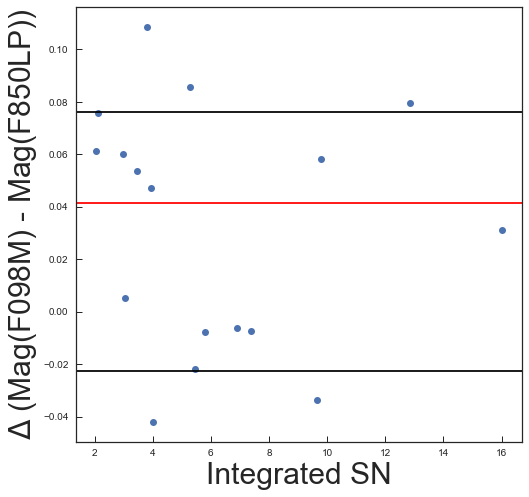

In [46]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(SNr,Magnitude((f098DBr['sim-f098']*f098DBr['meas-f850'])/(f098DBr['meas-f098']*f098DBr['sim-f850'])),'o')
plt.axhline(medr,color = 'r')
plt.axhline(medr-mlerrr,color = 'k')
plt.axhline(medr+mherrr,color = 'k')
plt.ylabel('$\Delta$ (Mag(F098M) - Mag(F850LP))',fontsize = 30)
plt.xlabel('Integrated SN',fontsize = 30)
plt.show()
plt.close()